In [1]:
# MNIST숫자 손글씨 Dataset 불러들이기
# 텐소플로우의 표준 API인 tf.keras의 Sequential API를 이용 - 숫자 손글씨 인식기

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)    # Tensorflow 버전 출력

2.4.1


In [3]:
mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))    # x_train 배열의 크기를 출력

60000


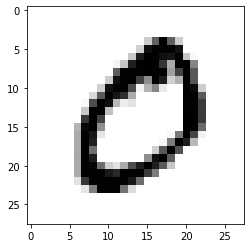

In [4]:
# MNIST 데이터셋의 X항목(x_train, x_test)은 이미지 데이터 담은 행렬(matrix)
plt.imshow(x_train[1], cmap = plt.cm.binary)    # x_train[1]은 x_train행렬의 2번째 이미지
plt.show()                                      # 1번째 이미지는 x_train[0]에 담김

In [5]:
print(y_train[1])    # X항목에는 숫자 0의 이미지 / Y항목에는 실제 숫자 값

0


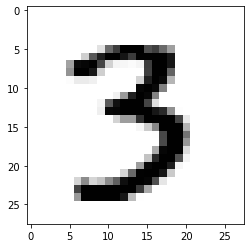

10001 번째 이미지의 숫자는 바로 3 입니다.


In [6]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index = 10000
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.show()
print((index+1), '번째 이미지의 숫자는 바로', y_train[index], '입니다.')

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train)은 학습용 데이터
# (x_test, y_test)는 시험용 데이터

# 숫자 손글씨 분류기는 학습용 데이터만을 가지고 학습시킴
# 학습이 끝난 후에는 시험용 데이터로 성능 테스트

In [8]:
# 불러들인 학습용 데이터 개수
print(x_train.shape)        # 28X28크기의 숫자 이미지가 60000장 있음

(60000, 28, 28)


In [9]:
# 불러들인 시험용 데이터 개수
print(x_test.shape)

(10000, 28, 28)


In [10]:
# 학습용 데이터, 검증용 데이터, 시험용 데이터
# 검증용 데이터는 
    # 머신러닝 학습 과정이 정상적으로 진행되는지, 
    # 오버피팅이 발생하고 있는지, 
    # 학습을 중단해도 되는지 등을 확인할 때 사용

# 교차 검증(cross validation) 기법
    # 고정된 train set, test set으로 평가하고 반복적으로 모델 튜닝하면 test set에 과적합
    # 교차 검증은 데이터 모든 부분을 사용하여 모델 검증, test set을 하나로 고정하지 않음

### 데이터 전처리 하기

In [11]:
# 손글씨 이미지 픽셀 값은 0~255 사이
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


In [12]:
# 인공지능 모델 사용할 때, 일반적으로 입력은 0~1 사이 값으로 정규화
# 255.0으로 나누기
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


## 1-3 딥러닝 네트워크 설계

In [13]:
# 데이터 준비가 완료되면 딥러닝 네트워크 만들어야 함.
# 텐서플로우 케라스에서 Sequential API 방법 사용

# 다음 코드는 tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크 설계한 예
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
print('Model에 추가된 Layer 개수:', len(model.layers))

Model에 추가된 Layer 개수: 7


In [14]:
# Conb2D레이어의 첫 번째 인자 - 사용하는 이미지 특징의 수 - 16과 32 사용
    # 가장 먼저 16개 이미지 특징, 그 뒤 32개의 이미지 특징을 고려한다.
    # 복잡한 이미지의 경우 특징 숫자를 늘려주는 것을 고려
    
# Dense레이어의 첫 번째 인자 - 분류기에 사용되는 뉴런의 숫자
    # 값이 클 수록 복잡한 분류기 만들 수 있음
    # 10개의 숫자가 아닌 알파벳 구분하고 싶을 때에는 
    # 대문자26 소문자26 총 52개의 클래스 분류
    # 따라서 32보다 큰 64, 128 고려할 수 있음
    
    # 마지막 Dense레이어의 뉴런 숫자는 결과적으로 분류해야 하는 클래스 수로 지정
    # 숫자 인식기에서는 10, 알파벳 인식기에서는 52
    
# 딥러닝 네트워크 모델 확인 -> model.summary()

In [15]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 1-4 딥러닝 네트워크 학습시키기

In [16]:
# 우리가 만든 네트워크의 입력은 
# (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태
# 그러나 print(x_train.shape)하면 (60000,28,28)로 채널수 정보 X
# (60000,28,28,1)로 만들어 주어야 함

# 채널수 1: 흑백 이미지
# 컬러 이미지 -> R, G, B 세 값이 있음 -> 채널수 3

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)
# 데이터 개수에 -1 쓰면 reshape시 자동 계산

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [17]:
# x_train 학습 데이터로 딥러닝 네트워크 학습시키기
# epochs = 10 -> 전체 60000개 데이터를 10번 반복 사용해서 학습시키기
# 형태를 맞춘 x_train_reshaped 사용

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4532 - accuracy: 0.8632
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0677 - accuracy: 0.9786
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0461 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0269 - accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0231 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 18s 10m

In [18]:
# epoch별로 인식 정확도(accuracy)가 0.8632에서 0.9970으로 올라감

## 1-5 얼마나 잘 만들었는지 확인하기

In [19]:
# 위의 인식 정확도는 학습용 데이터(x-train)를 가지고 구한 것
# 이제 시험용 데이터(x_test)로 성능 확인하기

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0390 - accuracy: 0.9876
test_loss: 0.03898116573691368
test_accuracy: 0.9876000285148621


In [ ]:
# 학습용 데이터로 구한 인식 정확도인 0.9970보다 떨어진 0.9876으로 결과 도출

In [20]:
# 잘못 추론한 데이터 확인하기
# model.evaluate() 대신 model.predict() 사용 
# -> model이 입력값을 보고 실제로 추론한 확률분포 출력
# model => 10개 숫자 중 어떤 것일지에 대한 확률값을 출력하는 함수라고 할 수 있음

predicted_result = model.predict(x_test_reshaped)   # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0    # 1번째 x_test를 살피기
print('model.predict() 결과: ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과: ', predicted_labels[idx])
print('실제 데이터의 라벨: ', y_test[idx])

model.predict() 결과:  [3.0898278e-10 8.6623720e-12 4.2730602e-10 1.0674036e-08 5.8716659e-10
 1.1066680e-13 3.1946441e-16 1.0000000e+00 1.0269167e-13 1.8037362e-09]
model이 추론한 가장 가능성이 높은 결과:  7
실제 데이터의 라벨:  7


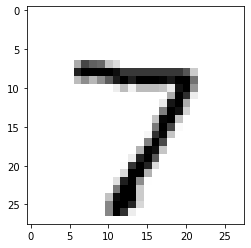

In [21]:
plt.imshow(x_test[idx], cmap = plt.cm.binary)
plt.show()

예측확률분포: [8.1211011e-09 2.0652926e-03 7.8983586e-03 4.2078318e-05 8.8370308e-07
 1.2185492e-09 4.8715941e-11 9.8999047e-01 4.2803813e-07 2.4978522e-06]
라벨: 2, 예측결과: 7


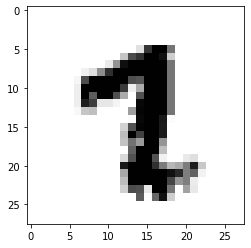

예측확률분포: [3.0678117e-07 1.8175475e-14 2.9792789e-12 1.3116595e-05 1.8115131e-09
 6.4834690e-01 6.3388278e-08 7.5640975e-13 3.5163957e-01 1.4170462e-08]
라벨: 8, 예측결과: 5


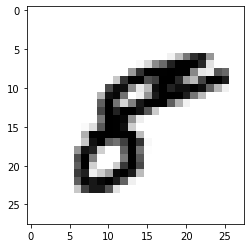

예측확률분포: [1.6223257e-05 3.5494423e-08 1.3615384e-07 2.3547038e-04 8.5869528e-02
 1.1172658e-02 3.6802180e-06 7.8383609e-06 3.1448055e-06 9.0269125e-01]
라벨: 4, 예측결과: 9


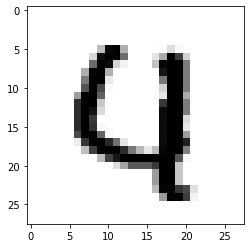

예측확률분포: [7.3645890e-12 2.7843892e-09 9.8524709e-11 9.3490905e-01 1.0169591e-09
 6.5089554e-02 4.8941058e-07 1.7280067e-12 9.3627216e-07 3.5172892e-08]
라벨: 5, 예측결과: 3


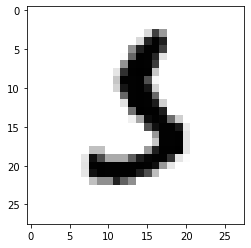

예측확률분포: [3.6301540e-08 3.8637907e-05 9.2363850e-09 1.3848754e-06 7.5427485e-01
 1.6526072e-07 1.3274740e-09 1.6961498e-02 1.5641195e-01 7.2311439e-02]
라벨: 9, 예측결과: 4


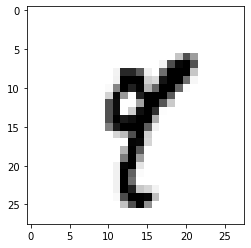

In [23]:
# model이 추론해낸 숫자와 실제 라벨의 값이 다른 경우

import random
wrong_predict_list = []

for i, _ in enumerate(predicted_labels):
    # i번째 test_labels와 y_test가 다른 경우만 모으기
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 1-6 더 좋은 네트워크 만들기

In [24]:
# 인식률을 다시 높일 수는 없을까?

# 하이퍼파라미터를 바꾸어 보자

# Conv2D에서 입력 이미지 특징 수를 늘리거나 줄이거나
# Dense레이어에서 뉴런수를 바꾸어 보거나,
# 학습 반복 횟수인 epoch값을 변경할 수 있다.

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs = n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [25]:
# 이전 결과보다 정확도가 높아짐

# 이전 결과
# test_loss: 0.03898116573691368
# test_accuracy: 0.9876000285148621

# 이후 결과
# test_loss: 0.035381343215703964
# test_accuracy: 0.9900000095367432